# Cálculo da volatilidade histórica com Python

**Bibliotecas importadas**

In [4]:
import pandas as pd
import numpy as np 
import yfinance as yf
import matplotlib.pyplot as plt 
plt.style.use('seaborn')

## Obtenção dos dados

De acordo com a [investopedia](https://www.investopedia.com/articles/investing/122215/spy-spdr-sp-500-trust-etf.asp):

<cite>
    "O SPDR S&P 500 ETF Trust, também conhecido como SPY ETF, é um dos fundos mais populares que visa rastrear o Índice Standard & Poor's (S&P) 500 , que compreende 500 ações de grande capitalização dos EUA. Essas ações são selecionadas por um comitê com base no tamanho do mercado, liquidez e setor".
</cite>

In [7]:
SPY = yf.download(
    tickers="SPY",
    start="2016-01-01",
    end="2021-12-31",
    progress=False
) 

In [9]:
SPY.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,200.490005,201.029999,198.589996,201.020004,179.554993,222353500
2016-01-05,201.399994,201.899994,200.050003,201.360001,179.858658,110845800
2016-01-06,198.339996,200.059998,197.600006,198.820007,177.589905,152112600


In [10]:
SPY.tail(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-28,477.720001,478.809998,476.059998,476.869995,475.393127,47274600
2021-12-29,476.980011,478.559998,475.920013,477.480011,476.001251,54503000
2021-12-30,477.929993,479.000000,475.670013,476.160004,474.685333,55329000


## Cálculo do retorno simples

In [12]:
SPY['simple_returns'] = SPY['Adj Close'].pct_change()
SPY.head()

,Open,High,Low,Close,Adj Close,Volume,simple_returns
Date,,,,,,,
2016-01-04,200.490005,201.029999,198.589996,201.020004,179.554993,222353500,NaN
2016-01-05,201.399994,201.899994,200.050003,201.360001,179.858658,110845800,0.001691
2016-01-06,198.339996,200.059998,197.600006,198.820007,177.589905,152112600,-0.012614
2016-01-07,195.330002,197.440002,193.589996,194.050003,173.329224,213436100,-0.023992
2016-01-08,195.190002,195.850006,191.580002,191.919998,171.426666,209817200,-0.010977


## Volatilidade histórica de 22 dias 

In [13]:
SPY['volatility'] = SPY['simple_returns'].rolling(22).std()
SPY.tail()

,Open,High,Low,Close,Adj Close,Volume,simple_returns,volatility
Date,,,,,,,,
2021-12-23,468.750000,472.190002,468.640015,470.600006,469.142548,56439700,0.006222,0.012536
2021-12-27,472.059998,477.309998,472.010010,477.260010,475.781921,56808600,0.014152,0.012869
2021-12-28,477.720001,478.809998,476.059998,476.869995,475.393127,47274600,-0.000817,0.012870
2021-12-29,476.980011,478.559998,475.920013,477.480011,476.001251,54503000,0.001279,0.011777
2021-12-30,477.929993,479.000000,475.670013,476.160004,474.685333,55329000,-0.002765,0.011589


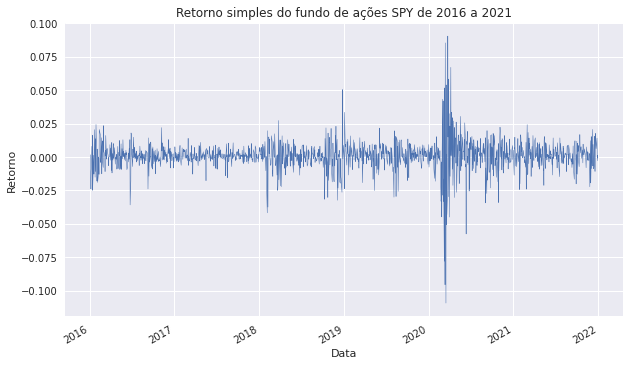

In [19]:
fig, ax = plt.subplots(figsize=(10,6))
SPY['simple_returns'].plot(lw=.5, ax = ax)
ax.set_xlabel('Data')
ax.set_ylabel('Retorno')
ax.set_title('Retorno simples do fundo de ações SPY de 2016 a 2021')
plt.show()

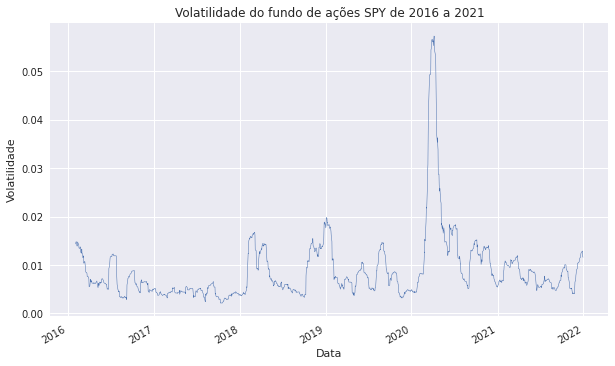

In [20]:
fig, ax = plt.subplots(figsize=(10,6))
SPY['volatility'].plot(lw=.5, ax = ax)
ax.set_xlabel('Data')
ax.set_ylabel('Volatilidade')
ax.set_title('Volatilidade do fundo de ações SPY de 2016 a 2021')
plt.show()

In [28]:
vol_pre_pandemia = SPY['2018-01-01':'2019-12-31']['volatility'].mean()
vol_pandemia = SPY['2020-01-01':]['volatility'].mean()
print(f"Volatilidade média pré-pandemia: {vol_pre_pandemia:.4f}")
print(f"Volatilidade média pandemia: {vol_pandemia:.4f}")

Volatilidade média pré-pandemia: 0.0085
Volatilidade média pandemia: 0.0122


In [31]:
print(f"{'Ano':4s} {'Volatilidade':>12s}")
for year in range(2016, 2022):
    vol = SPY[f'{year}-01-01':f'{year}-12-31']['volatility'].mean()
    print(f"{year:4d} {vol:12.4f}")

Ano  Volatilidade
2016       0.0074
2017       0.0042
2018       0.0090
2019       0.0080
2020       0.0165
2021       0.0078
